인구 구조가 알고 싶은 지역의 이름을 입력해 주세요: 인창동
경기도 구리시 인창동(4131053000)
경기도 고양시 (4128000000)


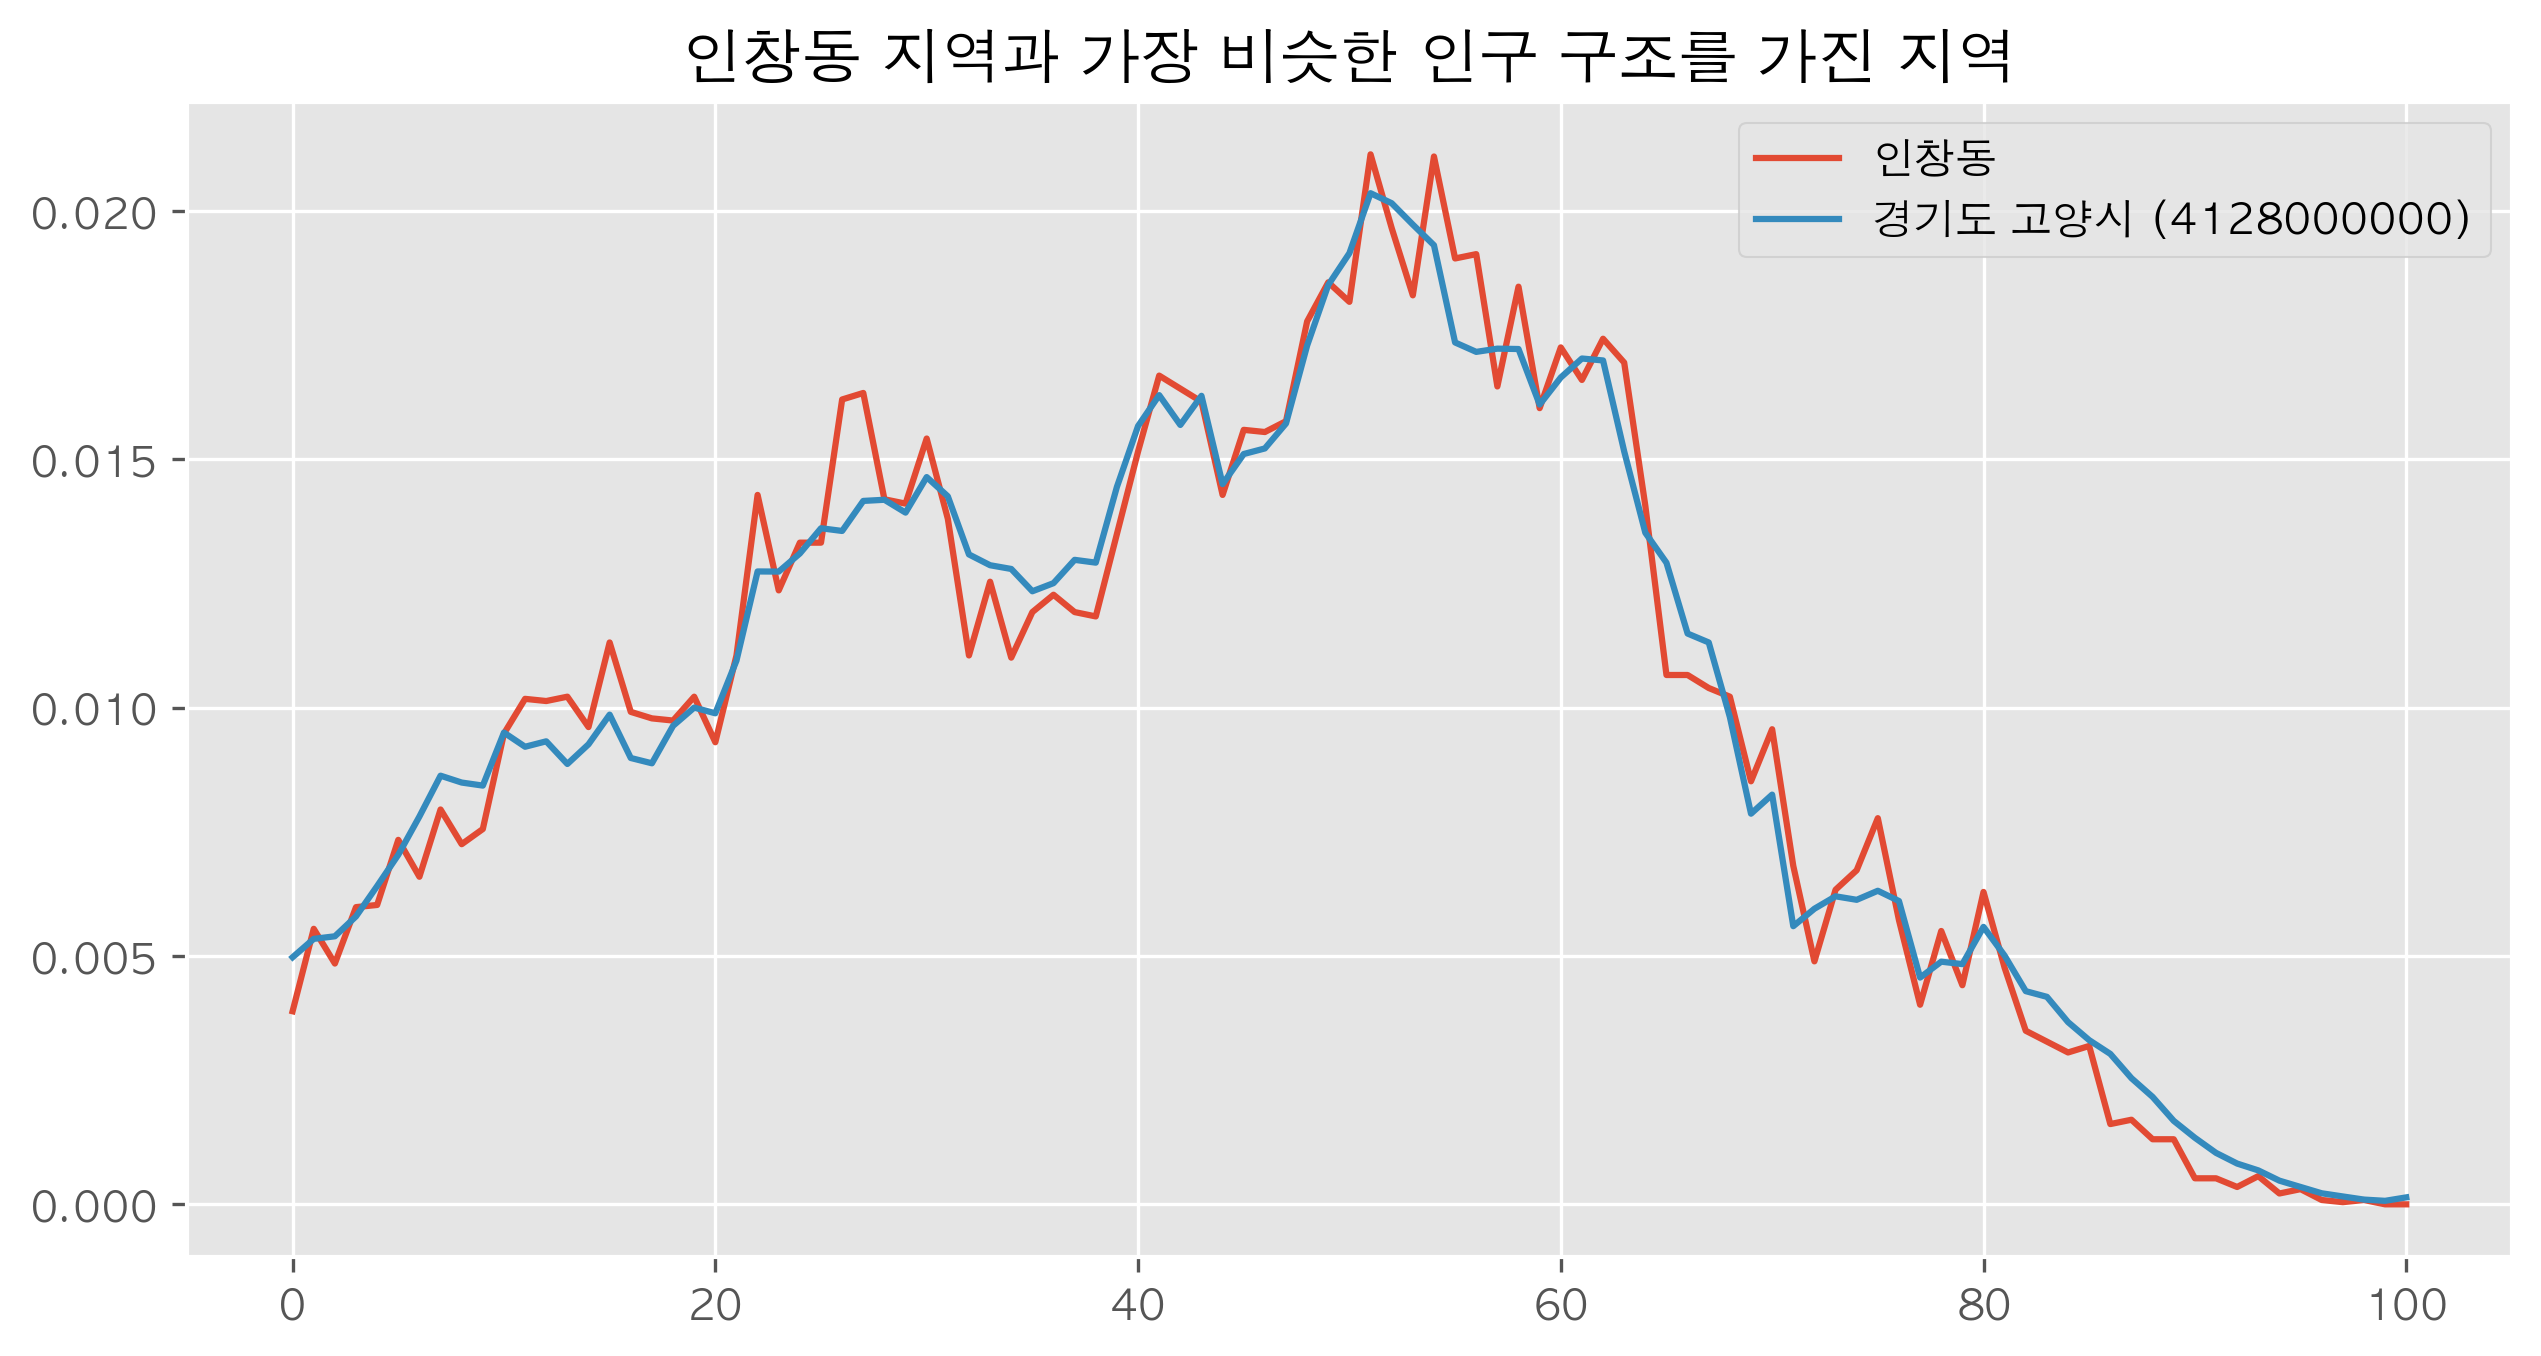

In [1]:
# 콤마를 없앴을 때 활용할 수 있는 깔끔한 코드
import numpy as np
import csv
import matplotlib.pyplot as plt

f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름을 입력해 주세요: ')
mn = 1
result_name = ''
result = 0
name_row = np.nan
away_row = np.nan

for row in data:
    if name in row[0]:
        name_row = row
        home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
    if int(row[2]) != 0:
        away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum((home - away)**2)
    if s < mn and name not in row[0]:
        mn = s
        away_row = row
        result_name = row[0]
        result = away

print(name_row[0])
print(away_row[0])
plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.rc('font', family = 'AppleGothic')
plt.title(name + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()

인구 구조가 알고 싶은 지역의 이름을 입력해주세요: 중랑구


/var/folders/8k/4r584v851sn_l75xw09cb0jr0000gn/T/ipykernel_88077/165847731.py:29: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:], dtype=int) / int(row[2])


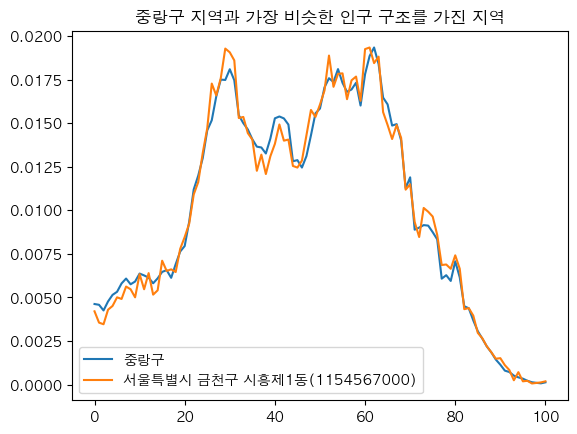

In [1]:
# 선택한 읍면동과 인구 구조가 가장 비슷한 동네를 찾는 코드

import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv', encoding = 'utf8')
data = csv.reader(f)
name = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요: ')
next(data)
data = list(data) # for row in data가 한 번 끝나도 다시 data를 쓸수있게 조치
mn = 1
result_name = ''
result = 0

for row in data:
    for i in range(len(row)):
        if ',' in row[i]:
            row[i] = int(row[i].replace(',', ''))

for row in data:
    if name in row[0]:
        # dtype = int는 리스트를 numpy 배열로 저장할 때 데이터 타입을 int로 변경
        home = np.array(row[3:], dtype = int) / int(row[2]) # 지역의 전체인구로 나눠서 비율로 저장
        break
        
for row in data:
    try:
        away = np.array(row[3:], dtype=int) / int(row[2])
        s = np.sum((home-away)**2)
        if s < mn and name not in row[0]:
            mn = s
            result_name = row[0]
            result = away
    except Exception as err:
        print(err)
        print(row)
        pass
        
        
plt.rc('font', family = 'AppleGothic')
plt.title(name + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()